# Modelo de Aprendizaje no Superviasado
# Dataset: Load Iris
## Fuente: sklearn https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
Índice<a name="indice"></a>
* [1 Prepocesado de datos](#1)
    * [1.1 Importación de librerías](#1_1)
    * [1.2 Carga del Dataset](#1_2)
* [2 Análisis Exploratorio de datos](#2)
    * [2.1 Estadísitcas descriptivas](#2_1)
* [3 Diseño de características](#3)
    * [3.1 Tratamiento de datos nulos](#3_1)
    * [3.2 Transformación de características](#3_2)
    * [3.3 Selección de características relevante](#3_3)
    * [3.4 Tratamiento de outliers](#3_4)
    * [3.5 Tratamiento de correlación](#3_5)
    * [3.6 Normalización](#3_6)
* [4 Método del codo](#4) 
* [5 K-Medias dataset sin normalizar con K óptimo](#5) 
* [6 K-Medias dataset normalizado con K óptimo](#6) 

### Descripción de la fuente
La fuente contiene muestras con diferentes medidas de la flor del lirio y la clase de lirio que es cada muestrar. Suele usarse para clasificación. Nosotros vamos a tratar de averiguar la clase de cada muestra. Es un diccionario de datos con los siguientes campos:
* _data_: Matriz o dataframe de pandas con las variables x. Hay 150 muestras y 4 variables    
* _target_: Variable objetivo. Clase de cada muestra (0, 1, 2)      
* _frame_: Dataframe con las variables idependientes y la variable objetivo          
* _feature_names_: Nombre de las variables independientes ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',  'petal width (cm)')   
* _target_names_: Nombre de las clases que se van a tratar  ('setosa', 'versicolor', 'virginica')      
* _DESCR_: Descripción del dataset
* _filename_: Fichero con los datos

# 1 PREPRECESADO DE DATOS <a name="1"></a>
[Índice](#indice)

## 1.1 Importación de librerías <a name="1_1"></a>
[Índice](#indice)

In [43]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def metodoCodo(datos, k_min, k_max):
    from sklearn.model_selection import cross_validate
    from sklearn.cluster import KMeans
    import numpy as np
    # Calculo WSS (Within-Cluster-Sum of Squared Errors) en función del 
    # número de clústers k
    # Calculo WSS (Within-Cluster-Sum of Squared Errors) en función del 
    # número de clústers k
    wss = []
    for K in range(k_min, k_max):
        clf = KMeans(init="random", random_state=0, n_clusters=K)
        clf.fit(datos)
        resultados = cross_validate(clf, datos, cv=4)
        wss.append(np.mean(resultados["test_score"]) * -1)

    # Represento el método del codo
    plt.plot(np.arange(k_min, k_max), wss)
    plt.xlabel("K")
    plt.ylabel("WSS")
    plt.title("Método del codo para obtener el K óptimo")
    plt.show()
    
def pintarClasificacion(datos, modelo):
    # i: variables del eje x
    # j: variable del eje y
    for i in range(0,len(datos.columns)-2):
        for j in range(0,len(datos.columns)-2):
            if(i!=j):
                plt.figure(figsize=(10,2.55))
                # Subgráfica con la clasificación real
                plt.subplot(1,2,1)
                sns.scatterplot(data=datos,x=datos.columns[i],y=datos.columns[j],hue='target',palette="deep")
                # Subgráfica con la clasificación k-means
                plt.subplot(1,2,2)
                sns.scatterplot(data=datos,x=datos.columns[i],y=datos.columns[j],hue='cluster',palette="deep")
                #Pintar el centroide
                plt.scatter(modelo.cluster_centers_[:,i],modelo.cluster_centers_[:,j],marker='*',c=['blue','red','green'],
                            s=100)
                plt.show()
    

## 1.2 Carga del dataset <a name="1_2"></a>
[Índice](#indice)

In [4]:
datos = load_iris(as_frame=True)
datos

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [5]:
df=datos['data']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
datos['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 2 PREPRECESADO DE DATOS <a name="2"></a>
[Índice](#indice)

## 2.1 Estadísticas descriptivas <a name="2_1"></a>
[Índice](#indice)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
datos['frame']['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# 3 DISEÑO DE CARACTERÍSTICAS <a name="3"></a>
[Índice](#indice)

## 3.1 Tratamiento de nulos <a name="3_1"></a>
[Índice](#indice)

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
df.isin(['','?']).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## 3.2 Transformación de características <a name="3_2"></a>
[Índice](#indice)

In [12]:
# Transformaciones de tipo

In [13]:
# No es necesario hacer label encoding

In [14]:
# One hot encoding: Geography y Gender


In [15]:
# Seleccionamos las columnas generadas con OHE y las cambiamos a categóricas


## 3.3 Selección de características relevantes <a name="3_3"></a>
[Índice](#indice)

In [16]:
# Eliminar irrelevantes

## 3.4 Tratamiento de outliers <a name="3_4"></a>
[Índice](#indice)

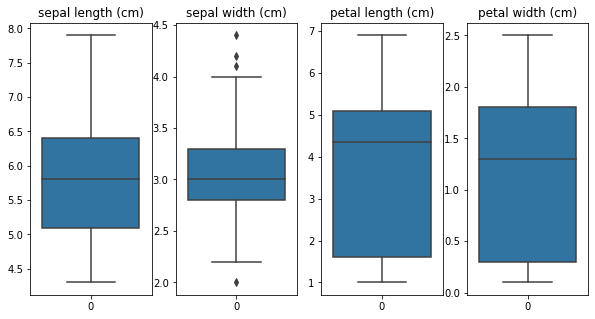

In [17]:
plt.subplots(sharex=False, sharey=False, figsize=(10,5))
for i in range(len(df.columns)):
    ax= plt.subplot(1,len(df.columns),i+1)
    sns.boxplot(data=df.iloc[:,i],ax=ax)
    ax.set_title(df.columns[i])

## 3.5 Tratamiento de Correlación <a name="3_5"></a>
[Índice](#indice)

<AxesSubplot:>

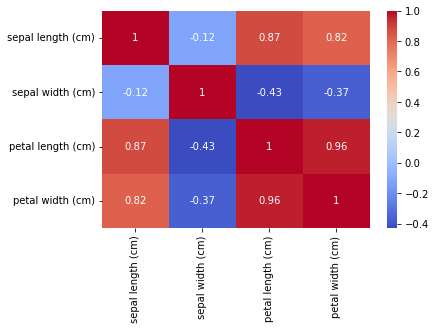

In [18]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

## 3.6 Normalización <a name="3_6"></a>
[Índice](#indice)

In [19]:
sc = StandardScaler()
dfNorm = sc.fit_transform(df)
dfNorm

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [20]:
dfNorm=pd.DataFrame(dfNorm,columns=df.columns)
dfNorm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# 4 Método del codo <a name="4"></a>
[Índice](#indice)

C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory le

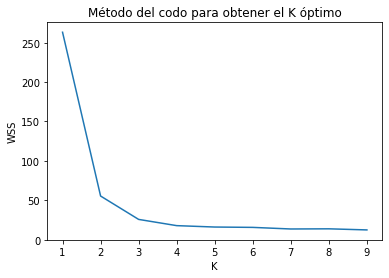

In [21]:
metodoCodo(df,1,10)

C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory le

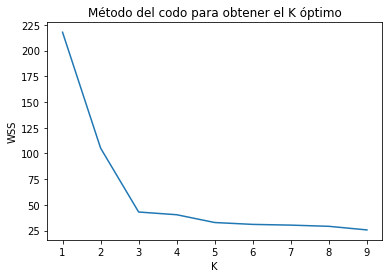

In [22]:
metodoCodo(dfNorm,1,10)

# 5 K- Means dataset sin normalizar y k óptimo <a name="5"></a>
[Índice](#indice)

In [23]:
modelo = KMeans(n_clusters=3, init='random', random_state=0)
modelo.fit(df)

KMeans(init='random', n_clusters=3, random_state=0)

In [24]:
# mostrar los centroides
modelo.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
# mostrar el grupo al que asigna cada muestra
modelo.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [26]:
# también se puede hacer con predict
pred = modelo.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [27]:
# Asignación real de muestras a grupos (trampa!!)
datos['target'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Evaluar cómo ha funcionado el modelo con el método de la puntuación de silueta
silhouette_score(df,modelo.labels_)

0.5528190123564102

In [29]:
# El valor no está mal, el maximo es 1.

In [30]:
# Creamos un nuevo dataframe con las x, la target y el cluster que se ha calculado
dfTodo = pd.DataFrame(pred, columns=['cluster'])
dfTodo = pd.concat([datos['frame'],dfTodo],axis=1)
dfTodo

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [31]:
# Ver aciertos y fallos
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']==dfTodo['cluster']])}")
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']!=dfTodo['cluster']])}")
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']==dfTodo['cluster']])/len(dfTodo*100)}")
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']!=dfTodo['cluster']])/len(dfTodo*100)}")

Nº de aciertos:134
Nº de aciertos:16
Nº de aciertos:0.8933333333333333
Nº de aciertos:0.10666666666666667


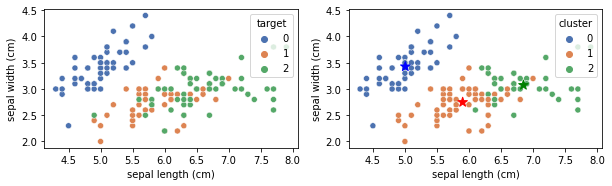

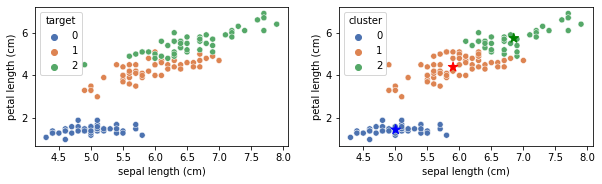

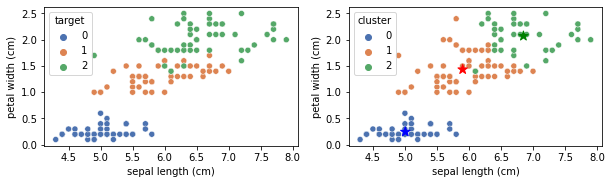

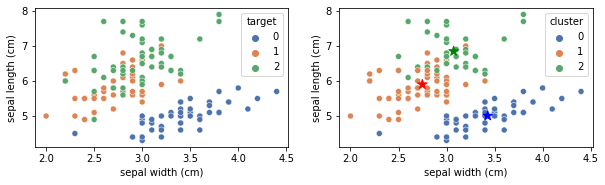

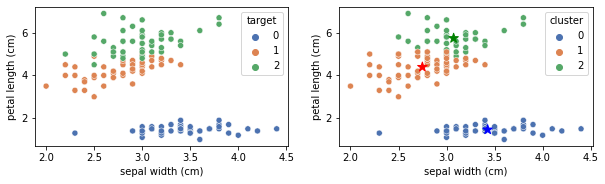

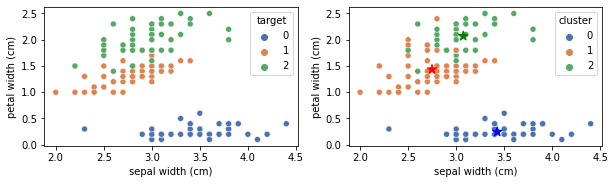

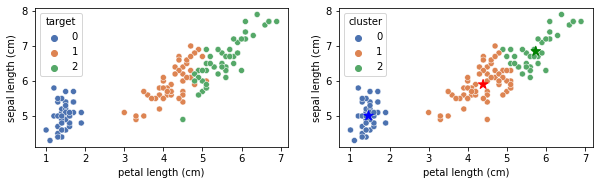

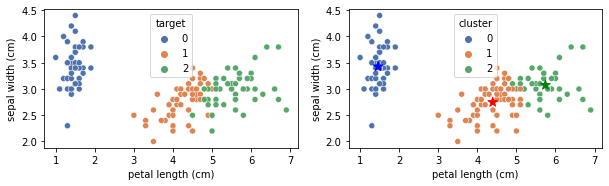

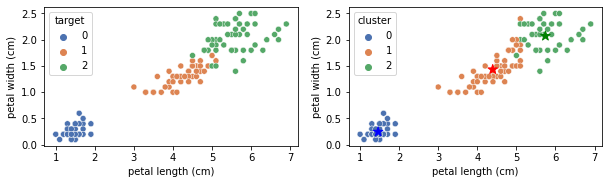

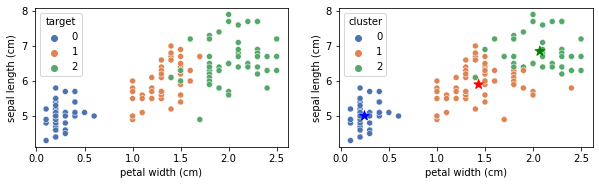

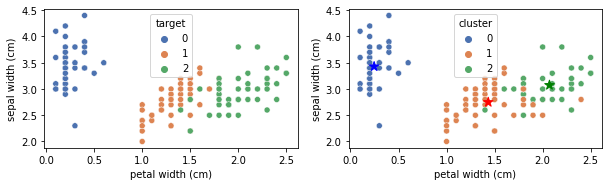

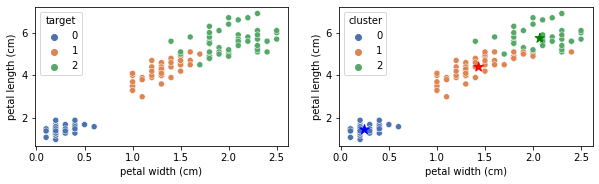

In [44]:
# Mosrtar gráficas con los grupos reales y los calculados por el modelo. Se pitan para cada dos variables.
pintarClasificacion(dfTodo, modelo)

# 6 K- Means dataset sin normalizar y k=2 <a name="5"></a>
[Índice](#indice)

In [23]:
modelo = KMeans(n_clusters=3, init='random', random_state=0)
modelo.fit(df)

KMeans(init='random', n_clusters=3, random_state=0)

In [24]:
# mostrar los centroides
modelo.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
# mostrar el grupo al que asigna cada muestra
modelo.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [26]:
# también se puede hacer con predict
pred = modelo.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [27]:
# Asignación real de muestras a grupos (trampa!!)
datos['target'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Evaluar cómo ha funcionado el modelo con el método de la puntuación de silueta
silhouette_score(df,modelo.labels_)

0.5528190123564102

In [29]:
# El valor no está mal, el maximo es 1.

In [30]:
# Creamos un nuevo dataframe con las x, la target y el cluster que se ha calculado
dfTodo = pd.DataFrame(pred, columns=['cluster'])
dfTodo = pd.concat([datos['frame'],dfTodo],axis=1)
dfTodo

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [31]:
# Ver aciertos y fallos
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']==dfTodo['cluster']])}")
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']!=dfTodo['cluster']])}")
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']==dfTodo['cluster']])/len(dfTodo*100)}")
print(f"Nº de aciertos:{len(dfTodo[dfTodo['target']!=dfTodo['cluster']])/len(dfTodo*100)}")

Nº de aciertos:134
Nº de aciertos:16
Nº de aciertos:0.8933333333333333
Nº de aciertos:0.10666666666666667


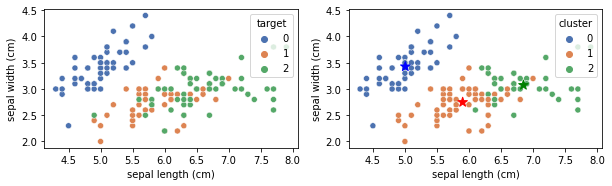

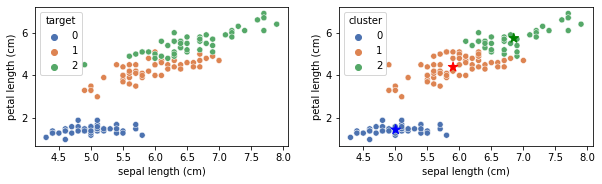

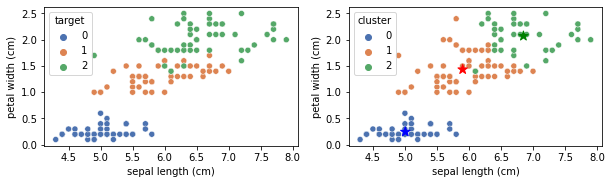

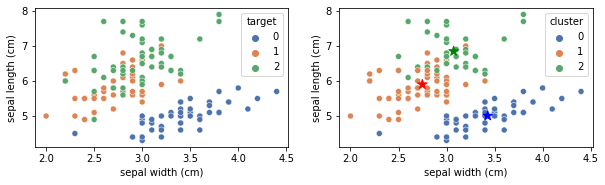

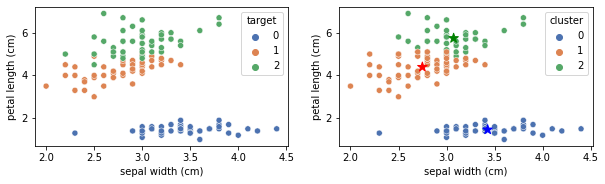

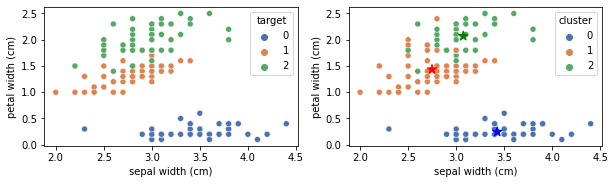

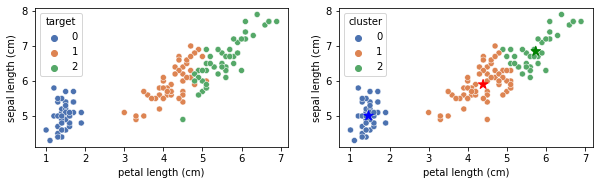

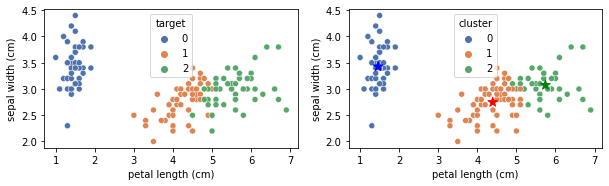

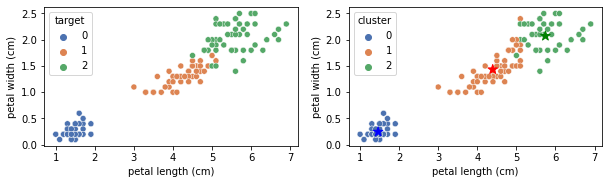

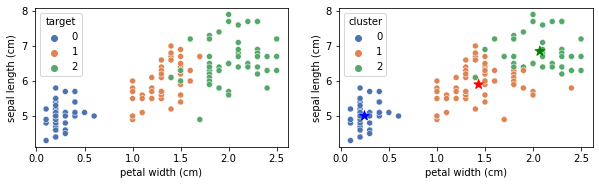

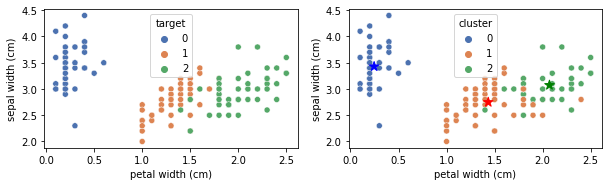

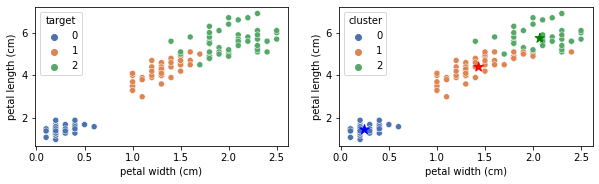

In [44]:
# Mosrtar gráficas con los grupos reales y los calculados por el modelo. Se pitan para cada dos variables.
pintarClasificacion(dfTodo, modelo)

# 6 K- Means dataset normalizado y k óptimo <a name="6"></a>
[Índice](#indice)